In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/My\ Drive/Vanderbilt/5th\ Semester\ 2020-2021/DS-5660/DL_course_hw/Homework\ 5/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5


In [8]:
!ls

apex		   cocoapi	       maskrcnn-benchmark.ipynb  __pycache__
cityscapesScripts  maskrcnn-benchmark  maskrcnn_benchmark.py


In [ ]:
%cd cocoapi/PythonAPI
! python setup.py build_ext install

In [ ]:
%cd ../../cityscapesScripts/
! python setup.py build_ext install

In [ ]:
%cd ../apex/
! python setup.py install --cuda_ext --cpp_ext

In [ ]:
!nvidia-smi

Thu Aug  6 13:57:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
! gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
%cd ../maskrcnn-benchmark/
! python setup.py build develop

In [ ]:
!pip install gpustat
!pip install fairseq
!apt-get install build-essential

In [6]:
!gpustat

4367b1e1c34f         Fri Aug  7 15:11:07 2020  418.67
[0] Tesla K80        | 56'C,   0 % |     0 / 11441 MB |


Below is the demo for using `maskrcnn-benchmark` for object detection.  

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [ ]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [ ]:
!pip freeze
# -e git+https://github.com/facebookresearch/maskrcnn-benchmark.git@57eec25b75144d9fb1a6857f32553e1574177daf#egg=maskrcnn_benchmark


In [9]:
!pip install yacs

In [3]:
# need to direct to the main folder to work
%cd maskrcnn-benchmark/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark


In [2]:
! pwd

/content


In [5]:
from maskrcnn_benchmark.config import cfg

In [7]:
%cd demo/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/demo


In [ ]:
# don't need this?
from predictor import COCODemo

AttributeError: ignored

In [10]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [11]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Downloading: "https://dl.fbaipublicfiles.com/detectron/35858933/12_2017_baselines/e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl" to /root/.torch/models/_detectron_35858933_12_2017_baselines_e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC_output_train_coco_2014_train%3Acoco_2014_valminusminival_generalized_rcnn_model_final.pkl
/usr/local/lib/python3.6/dist-packages/torch/hub.py:424: UserWarning: torch.hub._download_url_to_file has been renamed to            torch.hub.download_url_to_file to be a public API,            _download_url_to_file will be removed in after 1.3 release
  _download_url_to_file will be removed in after 1.3 release')


In [12]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

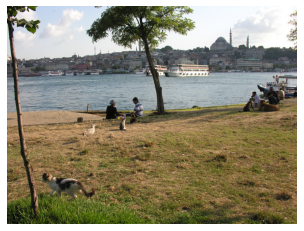

In [15]:
# from http://cocodataset.org/#explore?id=345434
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
imshow(image)

In [ ]:
python /path_to_maskrcnn_benchmark/tools/train_net.py --config-file "/path/to/config/file.yaml"